# K-Means Clustering

About Dataset

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv('segmentation data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [19]:
df.shape

(2000, 8)

In [31]:
X=df[['Income', 'Settlement size']].values

In [32]:
X

array([[124670,      2],
       [150773,      2],
       [ 89210,      0],
       ...,
       [ 86400,      0],
       [ 97968,      0],
       [ 68416,      0]])

## Using the elbow method to find the optimal number of clusters

In [22]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

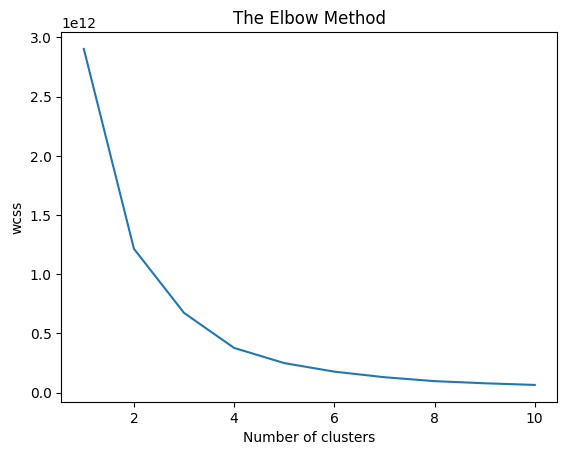

In [33]:
wcss=[]
for i in range(1, 11):
  kmeans=KMeans(n_clusters= i, init= 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


## Training the K-Means model on the dataset

In [34]:
kmeans=KMeans(n_clusters= 2, init= 'k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
y_kmeans

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

## Visualising the clusters

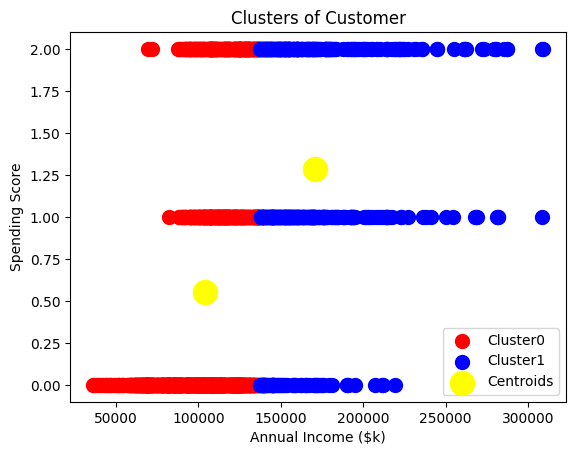

In [37]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c= 'red', label='Cluster0')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c= 'blue', label='Cluster1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customer')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

##Predicting a new result

In [38]:
kmeans.predict([[1,40000]])

array([0], dtype=int32)

##Hierarchical Clustering

##
Using the dendrogram to find the optimal number of clusters

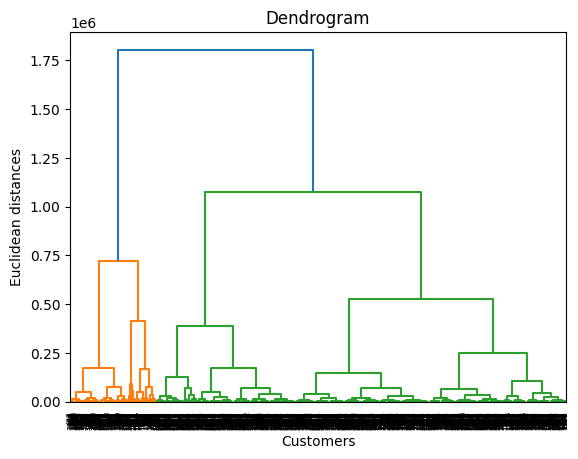

In [39]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##Training the Hierarchical Clustering model on the dataset

In [40]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##Visualising the clusters

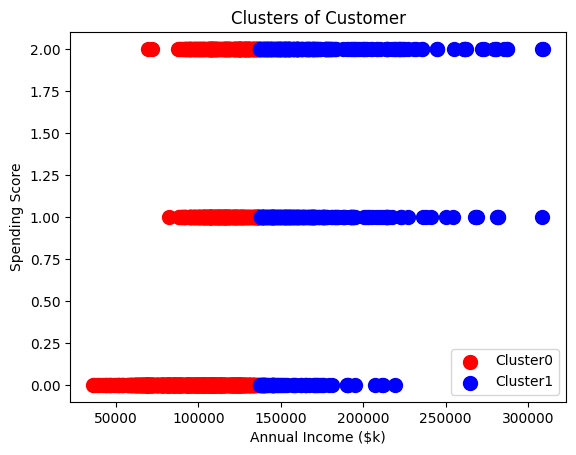

In [42]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c= 'red', label='Cluster0')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c= 'blue', label='Cluster1')
plt.title('Clusters of Customer')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()